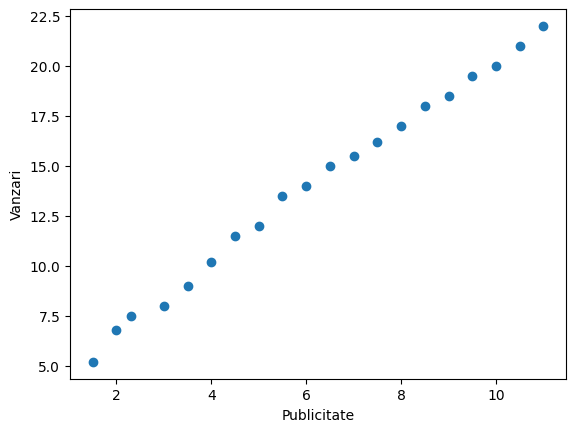

In [1]:
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt
import numpy as np

x = np.array([1.5, 2.0, 2.3, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0,
              6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0, 10.5, 11.0])
y = np.array([5.2, 6.8, 7.5, 8.0, 9.0, 10.2, 11.5, 12.0, 13.5, 14.0,
              15.0, 15.5, 16.2, 17.0, 18.0, 18.5, 19.5, 20.0, 21.0, 22.0])

plt.scatter(x, y)
plt.xlabel('Publicitate')
plt.ylabel('Vanzari')
plt.show()

a)


In [2]:
with pm.Model() as model_linear:
    alpha = pm.Normal('alpha', mu=0, sigma=10)
    beta = pm.Normal('beta', mu=0, sigma=10)
    epsilon = pm.HalfCauchy('epsilon', 5)

    mu = pm.Deterministic('mu', alpha + beta * x)

    y_pred = pm.Normal('y_pred', mu=mu, sigma=epsilon, observed=y)

    idata = pm.sample(2000, tune=2000, return_inferencedata=True)

Output()

ERROR:pymc.stats.convergence:There were 2 divergences after tuning. Increase `target_accept` or reparameterize.


b)


          mean     sd  hdi_2.5%  hdi_97.5%  mcse_mean  mcse_sd  ess_bulk  \
alpha    3.384  0.218     2.926      3.788      0.006    0.005    1393.0   
beta     1.704  0.031     1.648      1.772      0.001    0.001    1424.0   
epsilon  0.404  0.072     0.281      0.555      0.002    0.002    1388.0   

         ess_tail  r_hat  
alpha      1503.0    1.0  
beta       1423.0    1.0  
epsilon    1017.0    1.0  


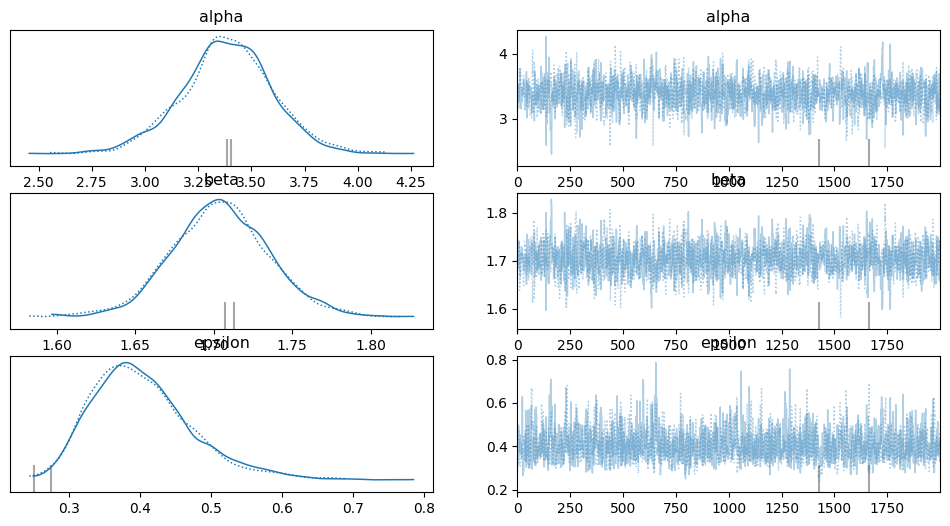

In [3]:
summary = az.summary(idata, var_names=['alpha', 'beta', 'epsilon'], hdi_prob=0.95)
print(summary)

# Vizualizarea urmelor
az.plot_trace(idata, var_names=['alpha', 'beta', 'epsilon'])
plt.show()

c)

Output()

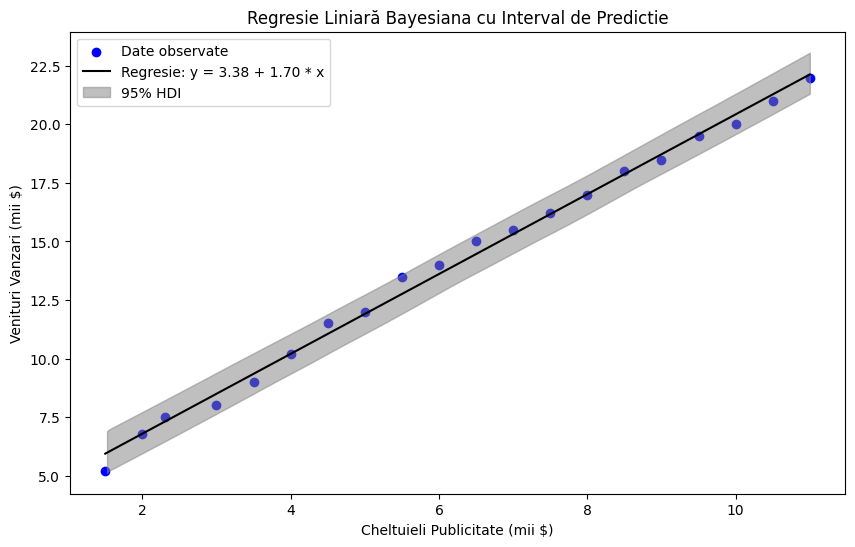

In [4]:
# Eșantionarea predictivei a posteriori
with model_linear:
    ppc = pm.sample_posterior_predictive(idata, extend_inferencedata=True)

# Vizualizare
plt.figure(figsize=(10, 6))

# Plotarea datelor observate
plt.scatter(x, y, c='blue', label='Date observate')

# Calcularea mediei parametrilor posteriori pentru linia de regresie
posterior = idata.posterior.stack(samples={"chain", "draw"})
alpha_m = posterior['alpha'].mean().item()
beta_m = posterior['beta'].mean().item()

# Plotarea liniei de regresie medie
plt.plot(x, alpha_m + beta_m * x, c='k', label=f'Regresie: y = {alpha_m:.2f} + {beta_m:.2f} * x')

# Plotarea intervalului de incertitudine (HDI)
# Notă: az.plot_hdi folosește datele din ppc
az.plot_hdi(x, ppc.posterior_predictive['y_pred'], hdi_prob=0.95, color='gray', fill_kwargs={'alpha': 0.5, 'label': '95% HDI'})

plt.xlabel('Cheltuieli Publicitate (mii $)')
plt.ylabel('Venituri Vanzari (mii $)')
plt.legend()
plt.title('Regresie Liniară Bayesiana cu Interval de Predictie')
plt.show()